In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C
import os
import mahotas as mh
import nibabel as nib
import nrrd

In [3]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [4]:
images, labels = C.Helper.load_data(DATAPATH)

In [5]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [6]:
# for each scan
train_i_patches = []
train_l_patches = []
test_i_patches = []
test_l_patches = []

P=256

In [7]:
symp_data = {}  
asymp_data = {}
patient_id = ''  
count = 0
counts = 0

for i in range(len(y_train)):
    image, header = nrrd.read(DATAPATH + "/" + X_train[i])
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    label, header = nrrd.read(DATAPATH + "/" + y_train[i])
    bbox = mh.bbox(label)
    #print(bbox)


    increase_x = 10
    increase_y = 10
    increase_z = 0
    target_size = P
    
    if target_size:
        widthY = bbox[1]-bbox[0]
        widthX = bbox[3]-bbox[2]
        #print(widthY)
        #print(widthX)

        increase_x = (target_size - widthX) // 2
        increase_y = (target_size - widthY) // 2

        #print(bbox)
        #print(widthY, widthX, increase_x, increase_y)

        bufferY = 0
        if (bbox[0]-increase_y + bbox[1]+increase_y) != target_size:
            bufferY = 1

        bufferX = 0
        if (bbox[2]-increase_x + bbox[3]+increase_x) != target_size:
            bufferX = 1

    # crop label and image according to bbox but make it a little larger
    label_cropped = label[bbox[0]-increase_y:bbox[1]+increase_y+bufferY,
                           bbox[2]-increase_x:bbox[3]+increase_x+bufferX,
                              bbox[4]:bbox[5]]
    image_cropped = image[bbox[0]-increase_y:bbox[1]+increase_y+bufferY,
                           bbox[2]-increase_x:bbox[3]+increase_x+bufferX,
                              bbox[4]:bbox[5]]


    train_i_patches.append(image_cropped)
    train_l_patches.append(label_cropped)


In [8]:
#for i in range(len(train_l_patches)):
#    print(train_l_patches[i].shape)

In [9]:
len(train_i_patches), len(train_l_patches)

(56, 56)

In [10]:
for i in range(len(y_test)):
    image, header = nrrd.read(DATAPATH + "/" + X_test[i])
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    label, header = nrrd.read(DATAPATH + "/" + y_test[i])
    bbox = mh.bbox(label)
    #print(bbox)


    increase_x = 10
    increase_y = 10
    increase_z = 0
    target_size = P
    
    if target_size:
        widthY = bbox[1]-bbox[0]
        widthX = bbox[3]-bbox[2]
        #print(widthY)
        #print(widthX)

        increase_x = (target_size - widthX) // 2
        increase_y = (target_size - widthY) // 2

        #print(bbox)
        #print(widthY, widthX, increase_x, increase_y)

        bufferY = 0
        if (bbox[0]-increase_y + bbox[1]+increase_y) != target_size:
            bufferY = 1

        bufferX = 0
        if (bbox[2]-increase_x + bbox[3]+increase_x) != target_size:
            bufferX = 1

    # crop label and image according to bbox but make it a little larger
    label_cropped = label[bbox[0]-increase_y:bbox[1]+increase_y+bufferY,
                           bbox[2]-increase_x:bbox[3]+increase_x+bufferX,
                              bbox[4]:bbox[5]]
    image_cropped = image[bbox[0]-increase_y:bbox[1]+increase_y+bufferY,
                           bbox[2]-increase_x:bbox[3]+increase_x+bufferX,
                              bbox[4]:bbox[5]]


    test_i_patches.append(image_cropped)
    test_l_patches.append(label_cropped)


In [11]:
for i in range(len(test_l_patches)):
    print(test_l_patches[i].shape)

(256, 257, 19)
(257, 256, 13)
(257, 257, 4)
(257, 257, 9)
(257, 256, 27)
(257, 257, 17)
(257, 256, 11)
(256, 256, 20)
(256, 257, 23)
(256, 257, 7)
(257, 256, 9)
(256, 256, 36)
(257, 256, 13)
(256, 257, 7)


In [12]:
len(test_i_patches), len(test_l_patches)

(14, 14)

In [13]:
test_i_patches[0].shape

(256, 257, 19)

In [14]:
train_i_patches[0].shape

(256, 256, 3)

In [31]:
slices = []
for i in range(len(train_i_patches)):
    for z in range(train_i_patches[i].shape[2]):
        slice_2d = train_i_patches[i][:, :, z]
        slices.append(slice_2d)


slices1 = []
for i in range(len(train_l_patches)):
    for z in range(train_l_patches[i].shape[2]):
        slice_2d = train_l_patches[i][:, :, z]
        slices1.append(slice_2d)
        
new_slices1 = []
for i in range(len(slices1)):
    slicess = np.where(slices1[i] != 0, True, False)
    new_slices1.append(slicess)

In [32]:
len(slices), len(slices1), len(new_slices1)

(600, 600, 600)

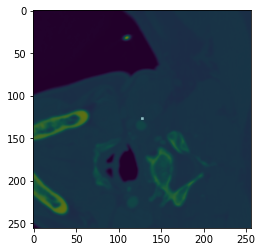

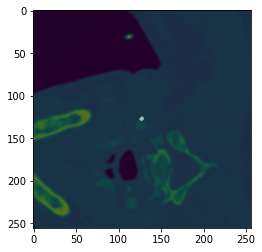

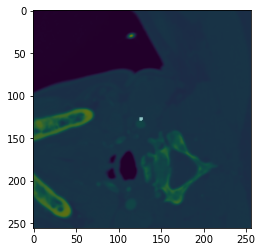

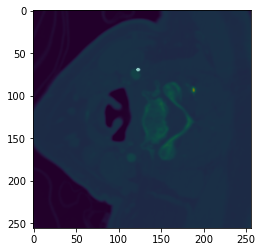

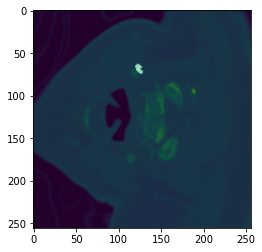

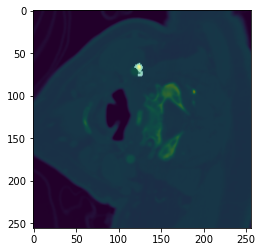

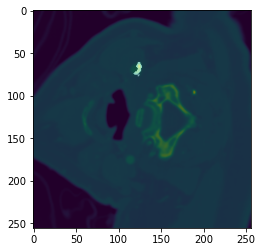

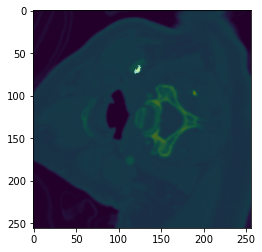

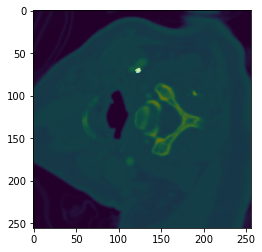

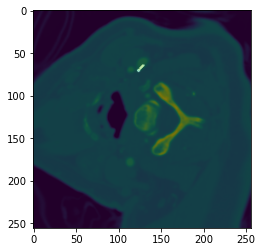

In [34]:
for i in range(10):  
    plt.imshow(slices[i])
    plt.imshow(slices1[i], cmap='gray', alpha=0.5)
    plt.show()

In [18]:
slices2 = []
for i in range(len(test_i_patches)):
    for z in range(test_i_patches[i].shape[2]):
        slice_2d = test_i_patches[i][:, :, z]
        slices2.append(slice_2d)

slices3 = []
for i in range(len(test_l_patches)):
    for z in range(test_l_patches[i].shape[2]):
        slice_2d = test_l_patches[i][:, :, z]
        slices3.append(slice_2d)  

new_slices3 = []
for i in range(len(slices3)):
    slices = np.where(slices3[i] != 0, True, False)
    new_slices3.append(slices)

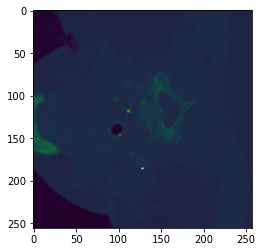

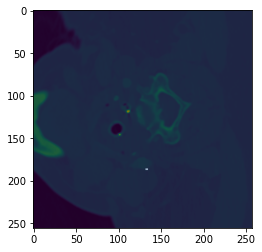

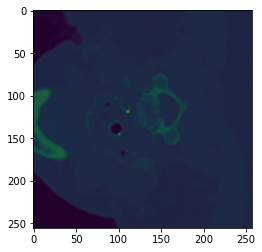

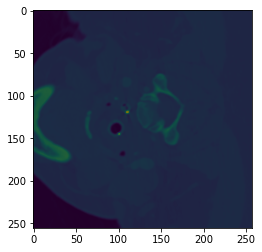

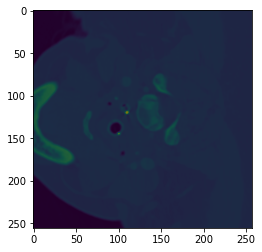

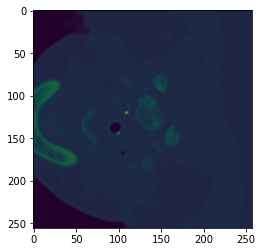

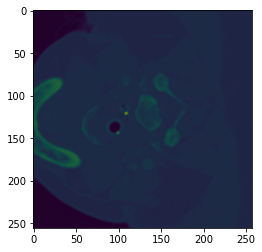

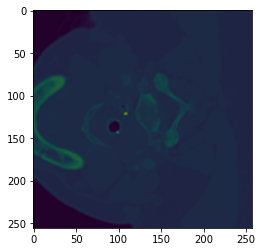

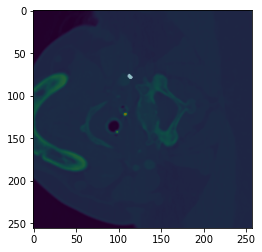

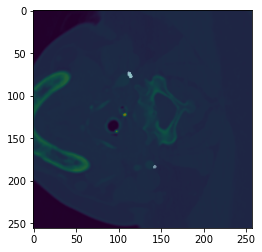

In [19]:
for i in range(10):  
    plt.imshow(slices2[i])
    plt.imshow(slices3[i], cmap='gray', alpha=0.5)
    plt.show()

In [20]:
len(slices2), len(slices3), len(new_slices3)

(215, 215, 215)

In [35]:
def list_to_array(l):
    count = len(l)

    d_y = l[0].shape[0]
    d_x = l[0].shape[1]

    out = np.zeros((count, d_y, d_x,1), dtype=l[0].dtype)

    for i in range(count):
        c_d_y = min(d_y, l[i].shape[0])
        c_d_x = min(d_x, l[i].shape[1])
        
        #print(out[i, 0:c_d_y,0:c_d_x].shape)
        #print(l[i][0:c_d_y,0:c_d_x].reshape(c_d_y, c_d_x, 1).shape)
        out[i, 0:c_d_y,0:c_d_x] = l[i][0:c_d_y,0:c_d_x].reshape(c_d_y, c_d_x, 1)

    return out

In [36]:
train_i_patches_a = list_to_array(slices)

In [37]:
train_i_patches_a.shape

(600, 256, 256, 1)

In [38]:
train_l_patches_a = list_to_array(new_slices1)

In [39]:
train_l_patches_a.shape

(600, 256, 256, 1)

In [40]:
test_i_patches_a = list_to_array(slices2)

In [41]:
test_i_patches_a.shape

(215, 256, 257, 1)

In [42]:
test_l_patches_a = list_to_array(new_slices3)

In [43]:
test_l_patches_a.shape

(215, 256, 257, 1)

In [44]:
symp_count = len(train_i_patches_a)
train_img_patches = np.zeros((symp_count, P,P,1), dtype=train_i_patches_a[0].dtype)

for i,img in enumerate(train_i_patches_a):
    train_img_patches[i] = train_i_patches_a[i,0:P,0:P]

In [45]:
symp_count = len(train_l_patches_a)
train_label_patches = np.zeros((symp_count, P,P,1), dtype=train_l_patches_a[0].dtype)

for i,img in enumerate(train_l_patches_a):
    train_label_patches[i] = train_l_patches_a[i,0:P,0:P]

In [46]:
train_img_patches.shape

(600, 256, 256, 1)

In [47]:
train_label_patches.shape

(600, 256, 256, 1)

In [48]:
symp_count = len(test_i_patches_a)
test_img_patches = np.zeros((symp_count, P,P,1), dtype=test_i_patches_a[0].dtype)

for i,img in enumerate(test_i_patches_a):
    test_img_patches[i] = test_i_patches_a[i,0:P,0:P]

In [49]:
symp_count = len(test_l_patches_a)
test_label_patches = np.zeros((symp_count, P,P,1), dtype=test_l_patches_a[0].dtype)

for i,img in enumerate(test_l_patches_a):
    test_label_patches[i] = test_l_patches_a[i,0:P,0:P]

In [50]:
test_img_patches.shape

(215, 256, 256, 1)

In [51]:
test_label_patches.shape

(215, 256, 256, 1)

In [52]:
slice_to_patient_mapping, last_key = C.Helper.map_and_key(train_l_patches)

In [53]:
X_train_set = train_img_patches[:last_key]
y_train_set = train_label_patches[:last_key]
X_val = train_img_patches[last_key:]
y_val = train_label_patches[last_key:]

In [54]:
model = C.Helper.create_unet(X_train_set[0].shape)

2023-11-24 04:36:02.031430: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


2023-11-24 04:36:04.245283: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-11-24 04:36:04.383217: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:07:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-24 04:36:04.385866: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-11-24 04:36:04.385894: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-11-24 04:36:04.389995: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-11-24 

In [55]:
model, history = C.Helper.train_unet(X_train_set, y_train_set, X_val, y_val, model, epochs=200)

2023-11-24 04:36:06.315465: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-24 04:36:06.336758: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-11-24 04:36:07.521472: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-11-24 04:36:08.143494: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-11-24 04:36:08.813466: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-11-24 04:36:08.813489: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-11-24 04:36:08.813555: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-24 04:36:10.006714: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-11-24 04:36:10.845263: I tensorflow/stream_exec

14/14 [==============================] - 137s 6s/step - loss: 0.4255 - iou: 2.5344e-04 - iou_thresholded: 0.0011 - val_loss: 0.0334 - val_iou: 3.1287e-05 - val_iou_thresholded: 0.0013
Epoch 2/200
14/14 [==============================] - 3s 187ms/step - loss: 0.0252 - iou: 1.9482e-04 - iou_thresholded: 9.3930e-04 - val_loss: 0.0104 - val_iou: 2.7613e-04 - val_iou_thresholded: 0.0013
Epoch 3/200
14/14 [==============================] - 3s 186ms/step - loss: 0.0110 - iou: 6.1519e-04 - iou_thresholded: 0.0024 - val_loss: 0.0065 - val_iou: 6.2115e-04 - val_iou_thresholded: 0.0013
Epoch 4/200
14/14 [==============================] - 3s 186ms/step - loss: 0.0080 - iou: 5.3061e-04 - iou_thresholded: 0.0015 - val_loss: 0.0057 - val_iou: 4.0716e-04 - val_iou_thresholded: 0.0013
Epoch 5/200
14/14 [==============================] - 3s 185ms/step - loss: 0.0071 - iou: 5.2279e-04 - iou_thresholded: 9.8838e-04 - val_loss: 0.0056 - val_iou: 5.5103e-04 - val_iou_thresholded: 0.0013
Epoch 6/200
14/14 [=

Epoch 44/200
14/14 [==============================] - 3s 186ms/step - loss: 9.9257e-04 - iou: 0.3983 - iou_thresholded: 0.5220 - val_loss: 0.0018 - val_iou: 0.2653 - val_iou_thresholded: 0.2780
Epoch 45/200
14/14 [==============================] - 3s 186ms/step - loss: 8.9730e-04 - iou: 0.4502 - iou_thresholded: 0.5825 - val_loss: 0.0018 - val_iou: 0.2823 - val_iou_thresholded: 0.3350
Epoch 46/200
14/14 [==============================] - 3s 186ms/step - loss: 8.5957e-04 - iou: 0.4549 - iou_thresholded: 0.5875 - val_loss: 0.0015 - val_iou: 0.3172 - val_iou_thresholded: 0.3677
Epoch 47/200
14/14 [==============================] - 3s 186ms/step - loss: 8.0219e-04 - iou: 0.4876 - iou_thresholded: 0.6293 - val_loss: 0.0017 - val_iou: 0.3011 - val_iou_thresholded: 0.3274
Epoch 48/200
14/14 [==============================] - 3s 186ms/step - loss: 8.2546e-04 - iou: 0.4928 - iou_thresholded: 0.6028 - val_loss: 0.0019 - val_iou: 0.2657 - val_iou_thresholded: 0.2748
Epoch 49/200
14/14 [==========

14/14 [==============================] - 3s 186ms/step - loss: 4.5838e-04 - iou: 0.6594 - iou_thresholded: 0.7505 - val_loss: 0.0024 - val_iou: 0.3546 - val_iou_thresholded: 0.3734
Epoch 87/200
14/14 [==============================] - 3s 186ms/step - loss: 4.9206e-04 - iou: 0.6494 - iou_thresholded: 0.7389 - val_loss: 0.0022 - val_iou: 0.3578 - val_iou_thresholded: 0.3727
Epoch 88/200
14/14 [==============================] - 3s 186ms/step - loss: 4.6488e-04 - iou: 0.6655 - iou_thresholded: 0.7496 - val_loss: 0.0024 - val_iou: 0.3591 - val_iou_thresholded: 0.3793
Epoch 89/200
14/14 [==============================] - 3s 187ms/step - loss: 4.4710e-04 - iou: 0.6711 - iou_thresholded: 0.7618 - val_loss: 0.0022 - val_iou: 0.3727 - val_iou_thresholded: 0.3926
Epoch 90/200
14/14 [==============================] - 3s 186ms/step - loss: 4.2752e-04 - iou: 0.6748 - iou_thresholded: 0.7630 - val_loss: 0.0022 - val_iou: 0.3683 - val_iou_thresholded: 0.3911
Epoch 91/200
14/14 [=======================

14/14 [==============================] - 3s 186ms/step - loss: 3.3686e-04 - iou: 0.7436 - iou_thresholded: 0.8075 - val_loss: 0.0022 - val_iou: 0.4047 - val_iou_thresholded: 0.4282
Epoch 129/200
14/14 [==============================] - 3s 186ms/step - loss: 3.3495e-04 - iou: 0.7354 - iou_thresholded: 0.8099 - val_loss: 0.0025 - val_iou: 0.4074 - val_iou_thresholded: 0.4211
Epoch 130/200
14/14 [==============================] - 3s 186ms/step - loss: 3.1162e-04 - iou: 0.7441 - iou_thresholded: 0.8149 - val_loss: 0.0029 - val_iou: 0.3669 - val_iou_thresholded: 0.3798
Epoch 131/200
14/14 [==============================] - 3s 187ms/step - loss: 3.1980e-04 - iou: 0.7473 - iou_thresholded: 0.8137 - val_loss: 0.0024 - val_iou: 0.3929 - val_iou_thresholded: 0.4078
Epoch 132/200
14/14 [==============================] - 3s 186ms/step - loss: 3.1586e-04 - iou: 0.7325 - iou_thresholded: 0.8075 - val_loss: 0.0027 - val_iou: 0.3625 - val_iou_thresholded: 0.3679
Epoch 133/200
14/14 [==================

14/14 [==============================] - 3s 186ms/step - loss: 2.1515e-04 - iou: 0.8170 - iou_thresholded: 0.8729 - val_loss: 0.0038 - val_iou: 0.3988 - val_iou_thresholded: 0.4061
Epoch 171/200
14/14 [==============================] - 3s 186ms/step - loss: 2.1072e-04 - iou: 0.8175 - iou_thresholded: 0.8749 - val_loss: 0.0038 - val_iou: 0.3909 - val_iou_thresholded: 0.3974
Epoch 172/200
14/14 [==============================] - 3s 186ms/step - loss: 2.0735e-04 - iou: 0.8106 - iou_thresholded: 0.8694 - val_loss: 0.0047 - val_iou: 0.3756 - val_iou_thresholded: 0.3836
Epoch 173/200
14/14 [==============================] - 3s 186ms/step - loss: 2.8778e-04 - iou: 0.7889 - iou_thresholded: 0.8402 - val_loss: 0.0040 - val_iou: 0.3792 - val_iou_thresholded: 0.3857
Epoch 174/200
14/14 [==============================] - 3s 187ms/step - loss: 2.6786e-04 - iou: 0.7880 - iou_thresholded: 0.8458 - val_loss: 0.0039 - val_iou: 0.3807 - val_iou_thresholded: 0.3896
Epoch 175/200
14/14 [==================

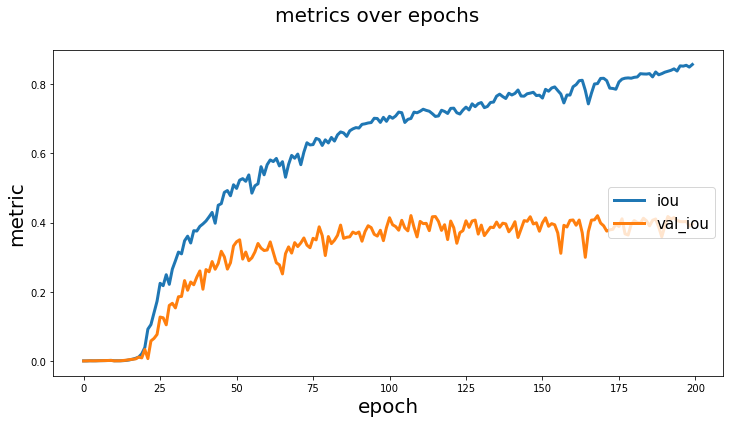

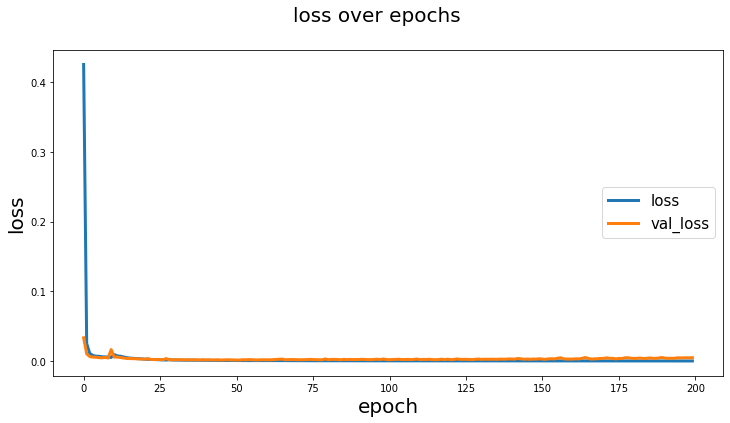

In [56]:
C.Helper.visualize_graph(history)

In [57]:
y_pred = C.Helper.prediction(test_img_patches, model)

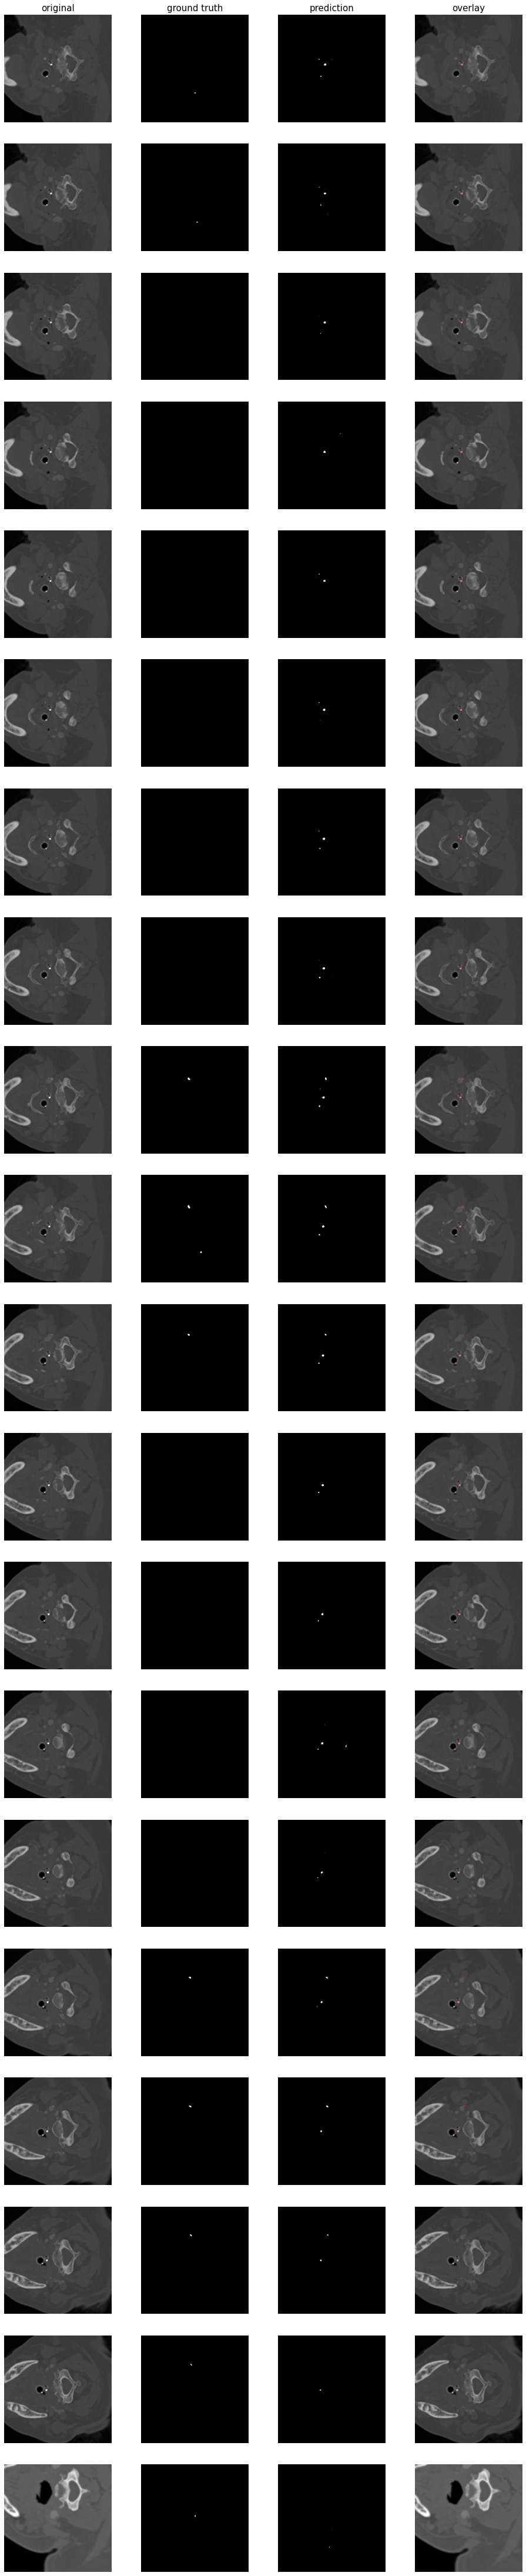

In [58]:
C.Helper.visualize_result(test_img_patches, test_label_patches, y_pred)

In [59]:
C.Helper.evaluate(test_img_patches, test_label_patches, model)

7/7 [==============================] - 0s 52ms/step - loss: 0.0200 - iou: 0.3101 - iou_thresholded: 0.3133
